# Import the required libraries 

In [67]:
# Import necessary libraries for image classification with deep learning

# OS and File System Libraries
import os # to interact with the operating system
from os import listdir, makedirs, getcwd, remove # for file system operations
from os.path import isfile, join, abspath, exists, isdir, expanduser # for file system path operations

# Suppress future warnings from libraries
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Randomization
import random # for randomization functions

# Path Manipulation
from pathlib import Path # to be able to use functions using path

# Data Manipulation Libraries
import pandas as pd # data processing
import numpy as np # linear algebra

# Deep Learning Libraries
import tensorflow as tf # deep learning library
from tensorflow.compat.v1 import Session, ConfigProto, set_random_seed # to set random seeds and configure sessions
from tensorflow.python.client import device_lib # to check the devices available for training
from tensorflow.keras.preprocessing import image

import keras # high-level API for deep learning models
from keras.models import Sequential, Model # Sequential is the simplest way to build models in Keras, and Model allows you to build complex models
from keras.applications.vgg16 import VGG16, preprocess_input # pre-trained deep learning model for image classification
from keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization # Layers used in building models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array# tools for image preprocessing and data augmentation
from keras.callbacks import ReduceLROnPlateau # to reduce the learning rate when the training reaches a plateau
from keras.applications.inception_v3 import InceptionV3 # pre-trained deep learning model for image classification
from keras.constraints import maxnorm # weight constraint to avoid overfitting
from keras import backend as K # to handle backend operations
from keras.optimizers import Adam

# OpenCV - computer vision library
import cv2

# Image Manipulation Libraries
from skimage.io import imread # to read images from disk
from skimage.transform import resize # to resize images

# Scikit-learn library for evaluation and data preprocessing
from sklearn.metrics import classification_report, confusion_matrix # tools for evaluation of classification models
from sklearn.preprocessing import LabelEncoder # for data preprocessing

# Visualization Libraries
from PIL import Image # Python Imaging Library - for opening, manipulating and saving images
import imgaug as aug # library for image augmentation
import imgaug.augmenters as iaa # augmentation techniques
import matplotlib.pyplot as plt # for visualization of graphs and charts
import matplotlib.image as mimg # for visualization of images
%matplotlib inline 
import seaborn as sns # for visualization of statistical data
import plotly.express as px # for visualization of graphs and charts

# Parsing the data

In [2]:
#Checking the content in the folder
print(os.listdir('CellData/chest_xray/train/'))

print(os.listdir("CellData/chest_xray/test/"))

['.DS_Store', 'NORMAL', 'PNEUMONIA']
['.DS_Store', 'NORMAL', 'PNEUMONIA']


In [3]:
#Checking the shape of each folder in the train subfolder
print(len(os.listdir('CellData/chest_xray/train/PNEUMONIA')),'Images in Pneumonia folder')
print(len(os.listdir('CellData/chest_xray/train/NORMAL')), 'Images in Normal folder')

3784 Images in Pneumonia folder
1249 Images in Normal folder


In [4]:
#Checking the shape of each folder in the test subfolder
print(len(os.listdir('CellData/chest_xray/test/PNEUMONIA')),'Images in Pneumonia folder')
print(len(os.listdir('CellData/chest_xray/test/NORMAL')), 'Images in Normal folder')

390 Images in Pneumonia folder
235 Images in Normal folder


255


Text(0.5, 1.0, 'File Name:VIRUS-7628373-0002.jpeg')

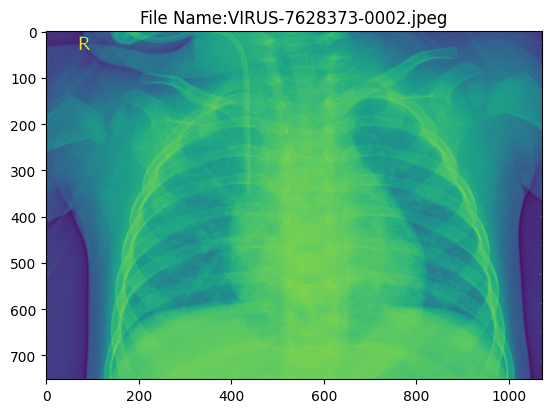

In [5]:
# Looking at random images from pnemonia subfolder
import matplotlib.image as mpimg

path='CellData/chest_xray/train/PNEUMONIA/'
rand=random.choice(os.listdir(path))
random_image=mpimg.imread(path+'/'+rand)
print(random_image.max())
plt.imshow(random_image)
plt.title("File Name:" + rand)

255


Text(0.5, 1.0, 'File Name:NORMAL-9105829-0003.jpeg')

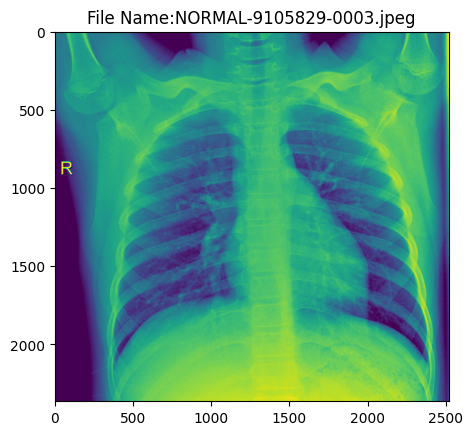

In [6]:
# Looking at random images from normal subfolder
import matplotlib.image as mpimg

path='CellData/chest_xray/train/NORMAL/'
rand=random.choice(os.listdir(path))
random_image=mpimg.imread(path+'/'+rand)
print(random_image.max())
plt.imshow(random_image)
plt.title("File Name:" + rand)

# EDA

## Raw Comparison

First, start by simply looking at a few randomly sampled images.
<br>This step will pull random images from each sub-folders and display them.

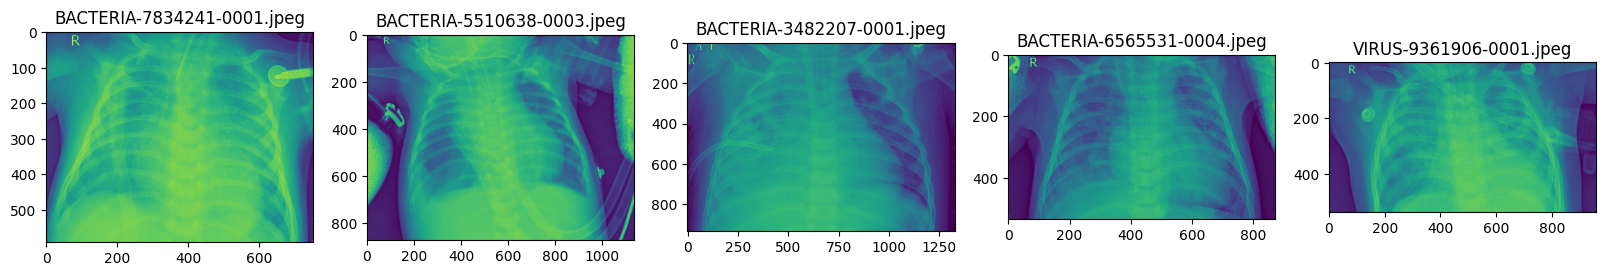

In [7]:
#Train -Pnemonia folder
plt.figure(figsize=(20,20))
test_folder=r'CellData/chest_xray/train/PNEUMONIA'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

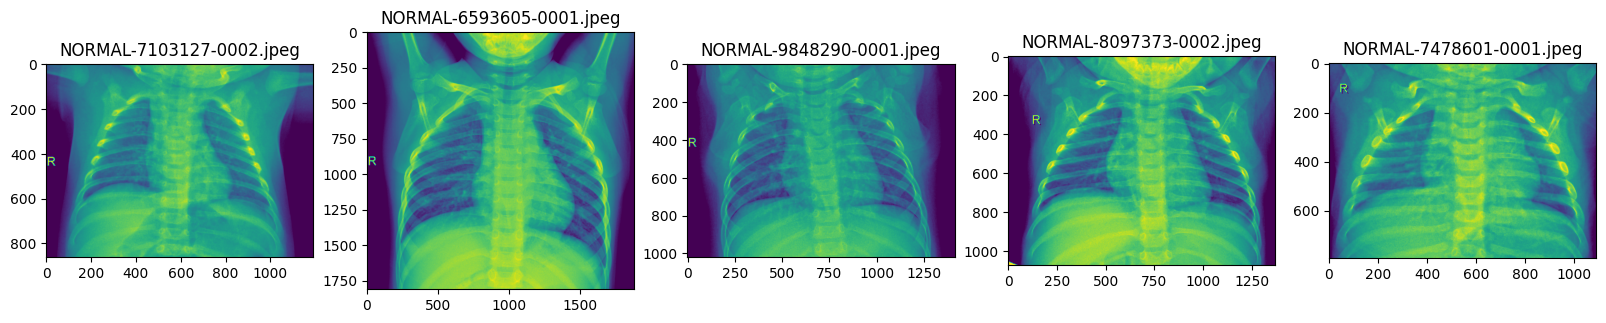

In [8]:
#Train -Normal folder
plt.figure(figsize=(20,20))
test_folder=r'CellData/chest_xray/train/NORMAL/'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

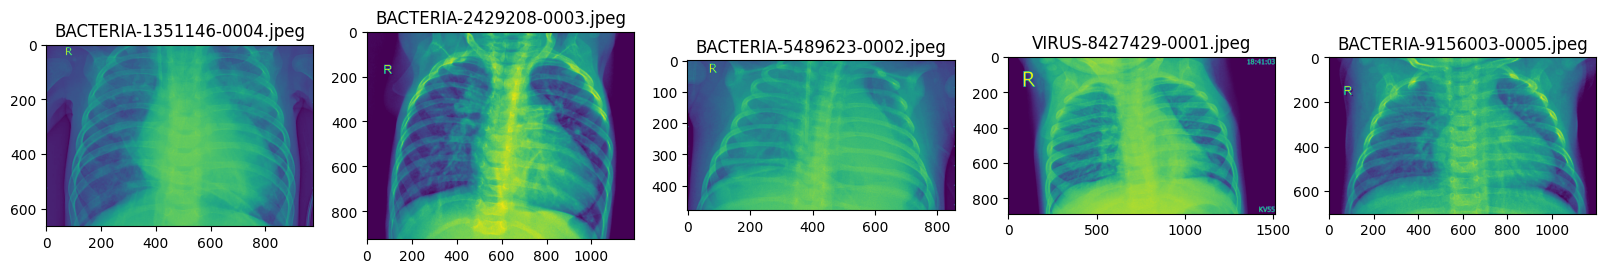

In [9]:
#Test -Pnemonia folder
plt.figure(figsize=(20,20))
train_folder=r'CellData/chest_xray/test/PNEUMONIA/'
for i in range(5):
    file = random.choice(os.listdir(train_folder))
    image_path= os.path.join(train_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

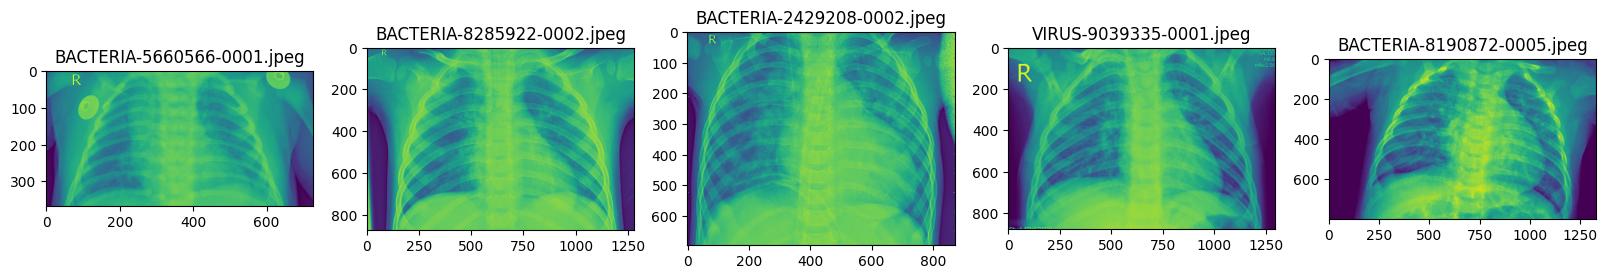

In [10]:
#Test -Normal folder
plt.figure(figsize=(20,20))
train_folder=r'CellData/chest_xray/test/PNEUMONIA/'
for i in range(5):
    file = random.choice(os.listdir(train_folder))
    image_path= os.path.join(train_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

## Images to matrices

In [11]:
# making n X m matrix
train_dir = 'CellData/chest_xray/train/'
test_dir = 'CellData/chest_xray/test'

normal_imgs = [fn for fn in os.listdir(f'{train_dir}/NORMAL') if fn.endswith('.jpeg')]
pneumo_imgs = [fn for fn in os.listdir(f'{train_dir}/PNEUMONIA') if fn.endswith('.jpeg')]

def img2np(path, list_of_filename, size = (64, 64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat


In [12]:
normal_images = img2np(f'{train_dir}/NORMAL/', normal_imgs)

In [13]:
pnemonia_images = img2np(f'{train_dir}/PNEUMONIA/', pneumo_imgs)

This function will iterate through each file and convert it to a (n, m) matrix, where n represents the number of observations and m represents the number of pixels.

## Average Image

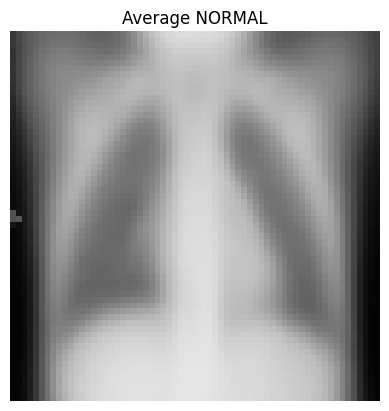

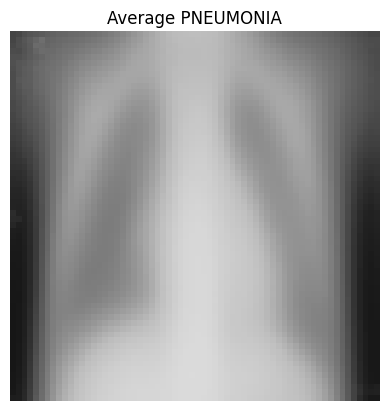

In [14]:
def find_mean_img(full_mat, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

norm_mean = find_mean_img(normal_images, 'NORMAL')
pneu_mean = find_mean_img(pnemonia_images, 'PNEUMONIA')

The average image shows that pneumonia X-rays have more obstruction around the chest area.

## Contrast between normal and pnemonia

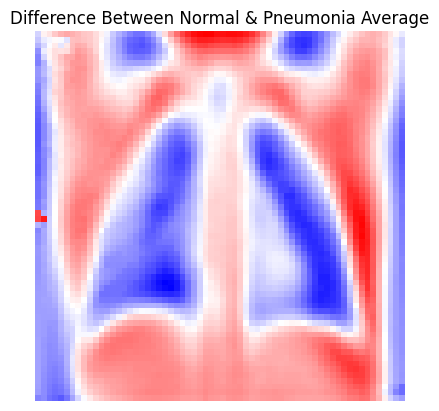

In [15]:
contrast_mean = norm_mean - pneu_mean
plt.imshow(contrast_mean, cmap='bwr')
plt.title(f'Difference Between Normal & Pneumonia Average')
plt.axis('off')
plt.show()

The image shows the difference between the normal and pnemonia averages.

## Variability

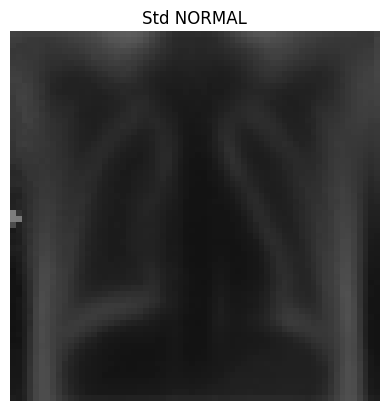

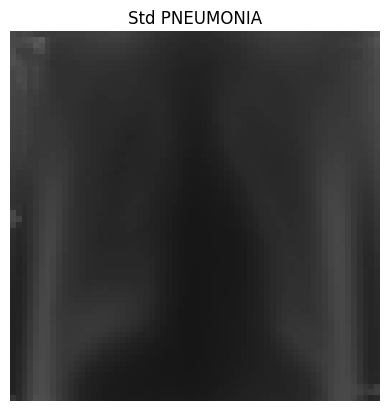

In [16]:
def find_std_img(full_mat, title, size = (64, 64)):
    # calculate the std
    std_img = np.std(full_mat, axis = 0)
    # reshape it back to a matrix
    std_img = std_img.reshape(size)
    plt.imshow(std_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Std {title}')
    plt.axis('off')
    plt.show()
    return std_img

norm_mean = find_std_img(normal_images, 'NORMAL')
pneu_mean = find_std_img(pnemonia_images, 'PNEUMONIA')

Similarly, we can determine which area in either class is the most variable by computing standard deviation instead of the mean. The lighter area indicates greater variability in this case. Again, we can see that there is more variability within the lungs in pneumonia X-rays.

## Eigenimages

Number of PC:  28


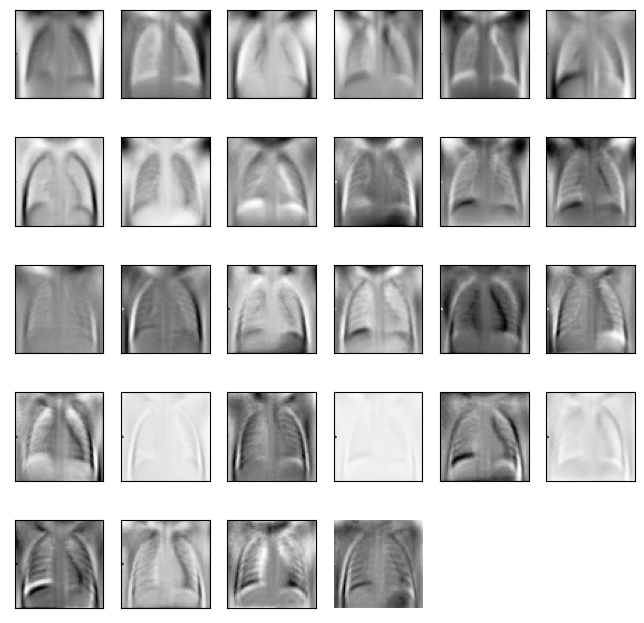

Number of PC:  14


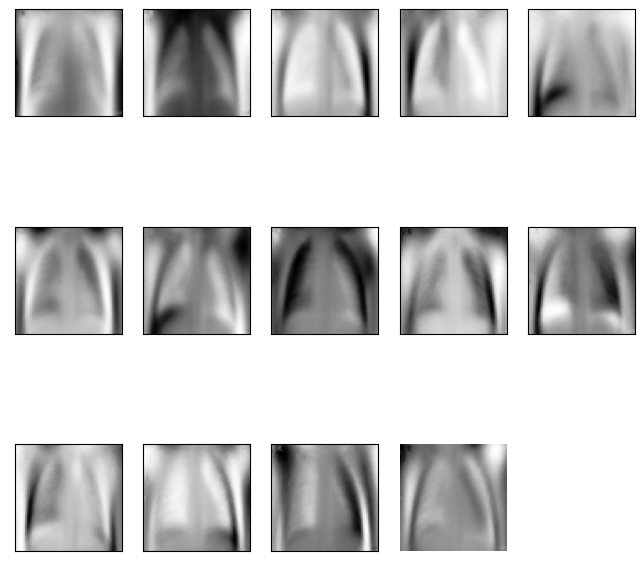

In [17]:
from sklearn.decomposition import PCA
from math import ceil

def eigenimages(full_mat, title, n_comp = 0.7, size = (64, 64)):
    # fit PCA to describe n_comp * variability in the class
    pca = PCA(n_components = n_comp, whiten = True)
    pca.fit(full_mat)
    print('Number of PC: ', pca.n_components_)
    return pca
  
def plot_pca(pca, size = (64, 64)):
    # plot eigenimages in a grid
    n = pca.n_components_
    fig = plt.figure(figsize=(8, 8))
    r = int(n**.5)
    c = ceil(n/ r)
    for i in range(n):
        ax = fig.add_subplot(r, c, i + 1, xticks = [], yticks = [])
        ax.imshow(pca.components_[i].reshape(size), 
                  cmap='Greys_r')
    plt.axis('off')
    plt.show()
    
plot_pca(eigenimages(normal_images, 'NORMAL'))
plot_pca(eigenimages(pnemonia_images, 'PNEUMONIA'))

To visualize the components that best describe each class, use a dimension reduction technique such as principal component analysis (PCA). The eigenimages of our image matrix, which are essentially the eigenvectors (components) of PCA, can be reshaped into a matrix and plotted. It's also known as eigenfaces because it was first used in facial recognition research. In this section, visualize the principal components that account for 70% of the variability in each class.

## Class Imbalance

In [18]:
train_path='CellData/chest_xray/train/PNEUMONIA'
test_path='CellData/chest_xray/test/PNEUMONIA'
normal_test_path = 'CellData/chest_xray/test/NORMAL'
normal_train_path = 'CellData/chest_xray/train/NORMAL'

In [19]:
number_classes = {'train Pneumonia': len(os.listdir(train_path)),
                  'Train Normal': len(os.listdir(normal_train_path)),
                  'test Pneumonia': len(os.listdir(test_path)),
                  'test Normal': len(os.listdir(normal_test_path)),}

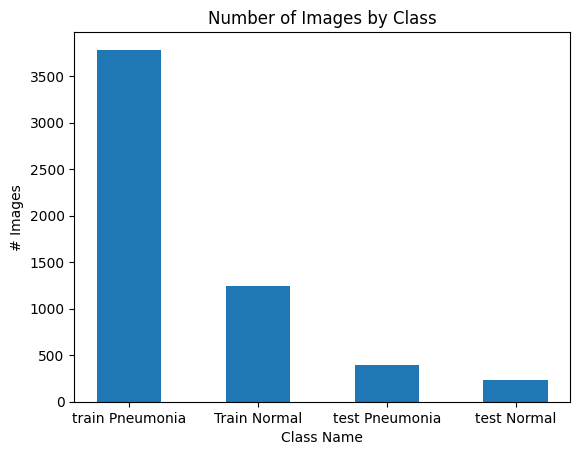

In [20]:
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

The dataset has class imbalance as can be seen. <br> The Pneumonia subfolder has more images compared to the normal subfolder.

# Image Augementation and Data Preprocessing

## Explore the RGB channels

In [21]:
# # Import OpenCV library
# import cv2 as cv

# # Open/Read input image
# img=cv.imread("chest_xray/train/PNEUMONIA/person1000_virus_1681.jpeg")

# # Splitting the image into different color channels 
# b,g,r=cv.split(img)

# cv.imshow("Red",r)
# cv.imshow("Green",g)
# cv.imshow("Blue",b)

# # Displays the output window untill any key is pressed
# cv.waitKey(0)

Text(0.5, 0.98, 'Original & RGB image channels')

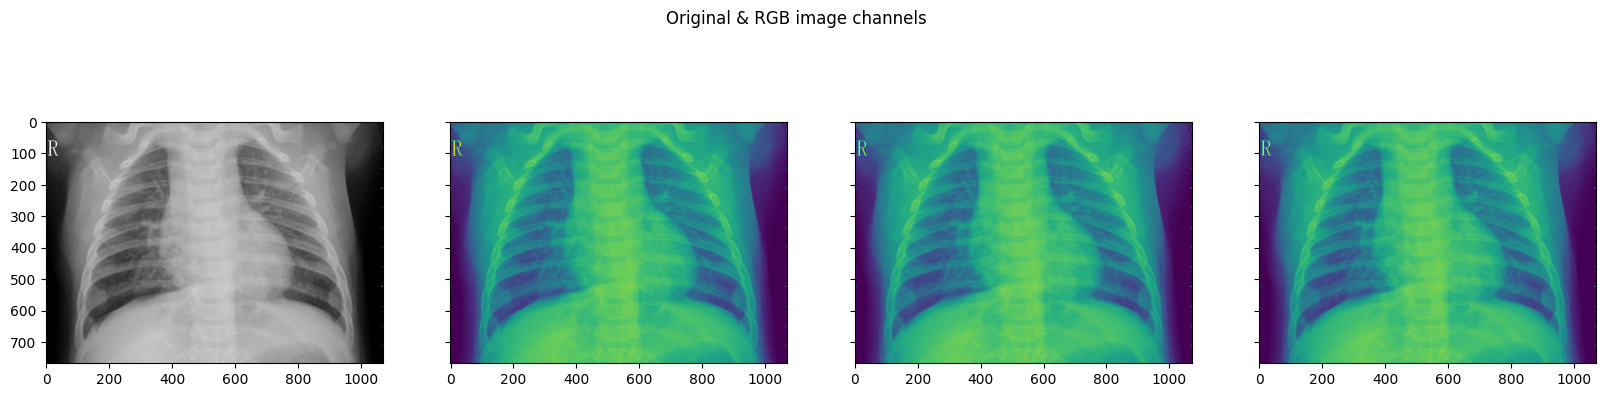

In [22]:
import cv2 as cv
img=cv.imread("chest_xray/train/PNEUMONIA/person1000_virus_1681.jpeg")

i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20) 

im1.imshow(img)  #Original image
im2.imshow(img[:, : , 0]) #Red
im3.imshow(img[:, : , 1]) #Green
im4.imshow(img[:, : , 2]) #Blue
i.suptitle('Original & RGB image channels')

Exploring the RGB channels of our original image before getting into augmentation of the images.

## Grayscale conversion

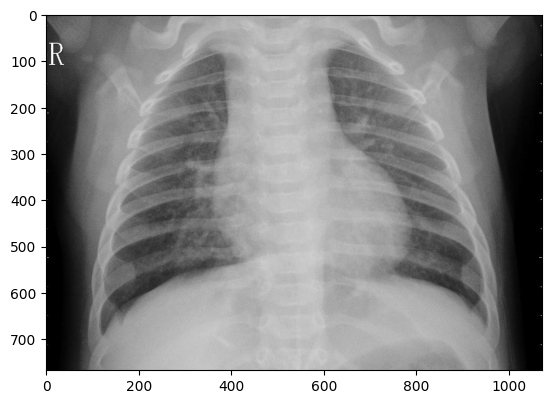

In [23]:
import skimage
gray_image = skimage.color.rgb2gray(img)
plt.imshow(gray_image, cmap = 'gray')

Grayscale is simply converting images from colored to black and white. It is normally used to reduce computation complexity in machine learning algorithms.

## Normalize the image

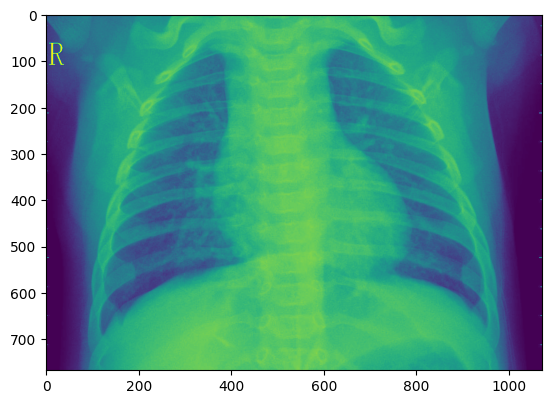

In [24]:
norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
plt.imshow(norm_image)

it is the process of projecting image data pixels (intensity) to a predefined range (usually (0,1) or (-1, 1)). This is commonly used on different data formats.

## Augmenting the dataset

### Creating the training and test datasets

In [25]:
#Training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                       labels='inferred',
                                                       image_size=(64,64),
                                                       batch_size= None, 
                                                       shuffle=True)
type(train_ds)
train_ds.element_spec

Found 5033 files belonging to 2 classes.


(TensorSpec(shape=(64, 64, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None))

In [26]:
test_ds = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                      labels='inferred',
                                                      image_size=(64,64), 
                                                      batch_size= None,
                                                      shuffle=True)
type(test_ds)
test_ds.element_spec

Found 624 files belonging to 2 classes.


(TensorSpec(shape=(64, 64, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None))

### Augmentation

In [28]:
import os
import shutil

# Define paths to train, validation, and test directories
base_dir = 'CellData/chest_xray/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Create validation directory
validation_normal_dir = os.path.join(validation_dir, 'NORMAL')
validation_pneumonia_dir = os.path.join(validation_dir, 'PNEUMONIA')

os.makedirs(validation_normal_dir, exist_ok=True)
os.makedirs(validation_pneumonia_dir, exist_ok=True)

# Move some images from train directory to validation directory
normal_files = os.listdir(os.path.join(train_dir, 'NORMAL'))
normal_val = normal_files[:100]
for file_name in normal_val:
    src = os.path.join(train_dir, 'NORMAL', file_name)
    dst = os.path.join(validation_normal_dir, file_name)
    shutil.move(src, dst)

pneumonia_files = os.listdir(os.path.join(train_dir, 'PNEUMONIA'))
pneumonia_val = pneumonia_files[:100]
for file_name in pneumonia_val:
    src = os.path.join(train_dir, 'PNEUMONIA', file_name)
    dst = os.path.join(validation_pneumonia_dir, file_name)
    shutil.move(src, dst)

Found 4185 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 1047 images belonging to 2 classes.


In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories for training and testing data
train_dir = 'CellData/chest_xray/train'
test_dir = 'CellData/chest_xray/test'

# Define data augmentation for training data
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    shear_range=0.1,
                    zoom_range=0.1,
                    horizontal_flip=True,
                    fill_mode='nearest')

# Define data normalization for testing data
test_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size and image size
batch_size = 32
img_size = (150, 150)

# Define generators for training and validation data
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=img_size,
                    batch_size=batch_size,
                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                    test_dir,
                    target_size=img_size,
                    batch_size=batch_size,
                    class_mode='binary')


Found 4833 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [57]:
train_generator.dtype

'float32'

In [58]:
validation_generator.dtype

'float32'

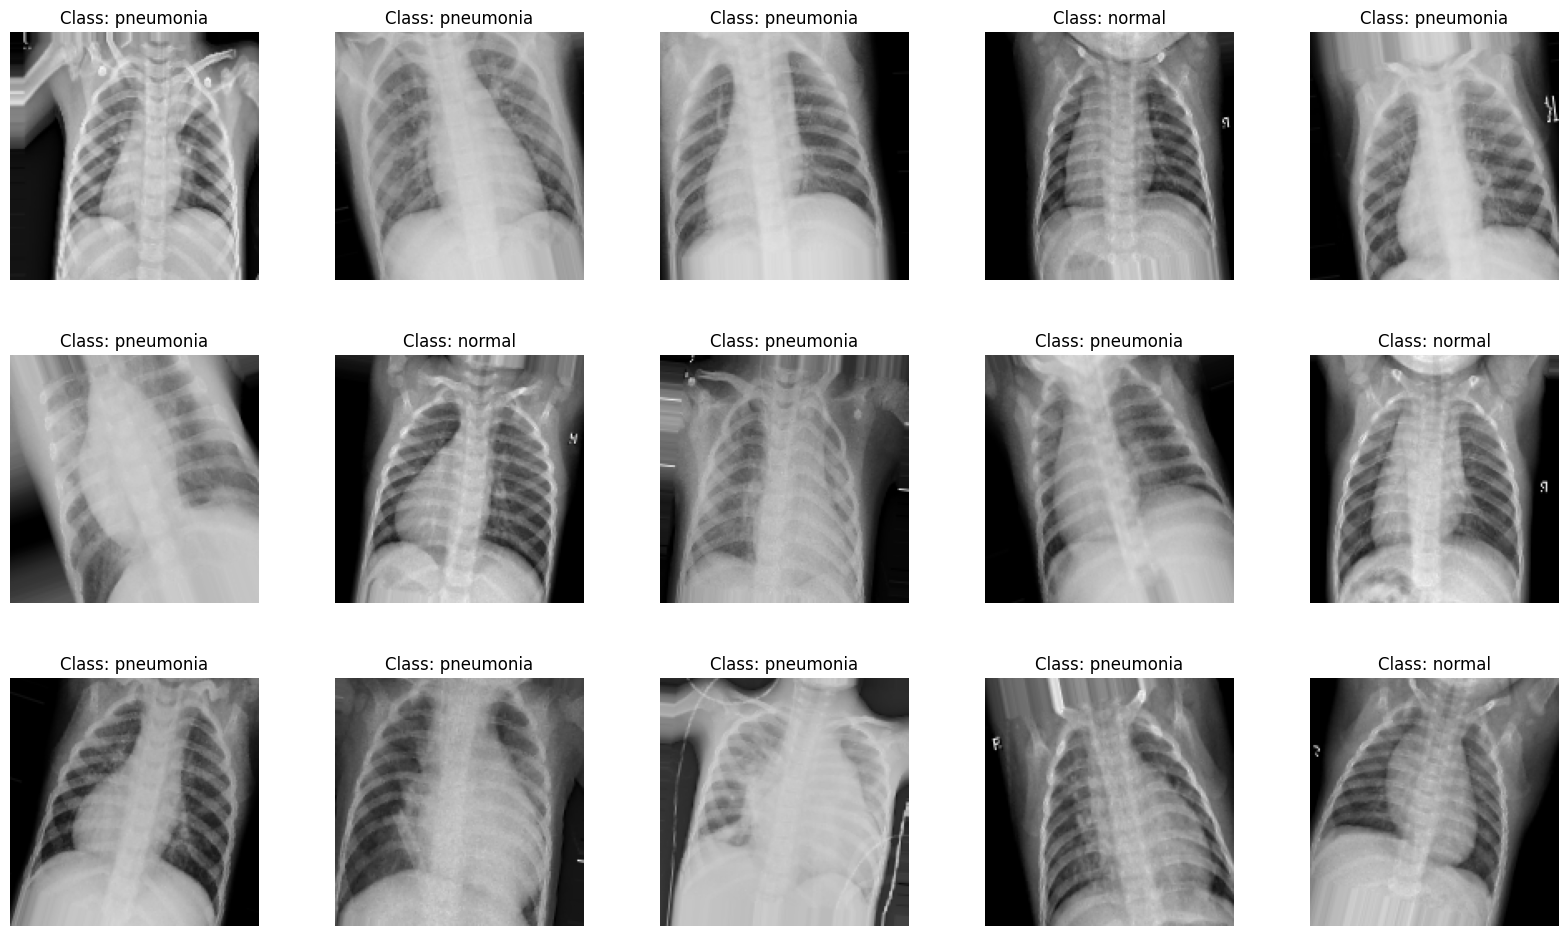

In [60]:
labels = ['normal', 'pneumonia']
samples = train_generator.__next__() #will generate a batch of images
images = samples[0]
target = samples[1]

plt.figure(figsize = (20,20))
for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[int(target[i])]}")
    plt.axis('off')

# Modelling

In [61]:
# VGG-Model architecture
model1 = Sequential([
    Conv2D(64, (2, 2), activation='relu', padding='same', input_shape=(150, 150, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 150, 150, 64)      832       
                                                                 
 conv2d_40 (Conv2D)          (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 75, 75, 128)       73856     
                                                                 
 conv2d_42 (Conv2D)          (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 37, 37, 128)      0         
 g2D)                                                 

In [63]:
model = Sequential()
model.add(Conv2D(64, (2, 2),strides=1, input_shape=(150, 150, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (2, 2),strides=2, activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(1, activation = "sigmoid"))

In [64]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 149, 149, 64)      832       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 37, 37, 128)       32896     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 18, 18, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 8, 8, 128)       

In [36]:
# from tensorflow.keras.callbacks import EarlyStopping

# # Define a callback for early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [68]:
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

C:\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
152/152 [==============================] - 161s 1s/step - loss: 0.5496 - accuracy: 0.7608 - val_loss: 0.6257 - val_accuracy: 0.6250
Epoch 2/10
152/152 [==============================] - 155s 1s/step - loss: 0.3927 - accuracy: 0.8194 - val_loss: 0.4320 - val_accuracy: 0.7965
Epoch 3/10
152/152 [==============================] - 152s 1s/step - loss: 0.2988 - accuracy: 0.8748 - val_loss: 0.2986 - val_accuracy: 0.8654
Epoch 4/10
152/152 [==============================] - 156s 1s/step - loss: 0.2537 - accuracy: 0.8903 - val_loss: 0.2728 - val_accuracy: 0.8814
Epoch 5/10
152/152 [==============================] - 144s 949ms/step - loss: 0.2288 - accuracy: 0.9067 - val_loss: 0.2468 - val_accuracy: 0.9087
Epoch 6/10
152/152 [==============================] - 144s 949ms/step - loss: 0.2084 - accuracy: 0.9158 - val_loss: 0.2163 - val_accuracy: 0.9151
Epoch 7/10
152/152 [==============================] - 142s 936ms/step - loss: 0.1947 - accuracy: 0.9222 - val_loss: 0.2076 - val_accurac

## Checking the model on test data

In [70]:
y_test = validation_generator.classes
y_pred = model.predict(validation_generator)
y_pred[y_pred>0.5]=1
y_pred[y_pred<0.5]=0

20/20 [==============================] - 11s 543ms/step


In [71]:
print(classification_report(y_test,y_pred,target_names=['Normal','Pneumonia']))

              precision    recall  f1-score   support

      Normal       0.37      0.37      0.37       234
   Pneumonia       0.62      0.63      0.62       390

    accuracy                           0.53       624
   macro avg       0.50      0.50      0.50       624
weighted avg       0.53      0.53      0.53       624



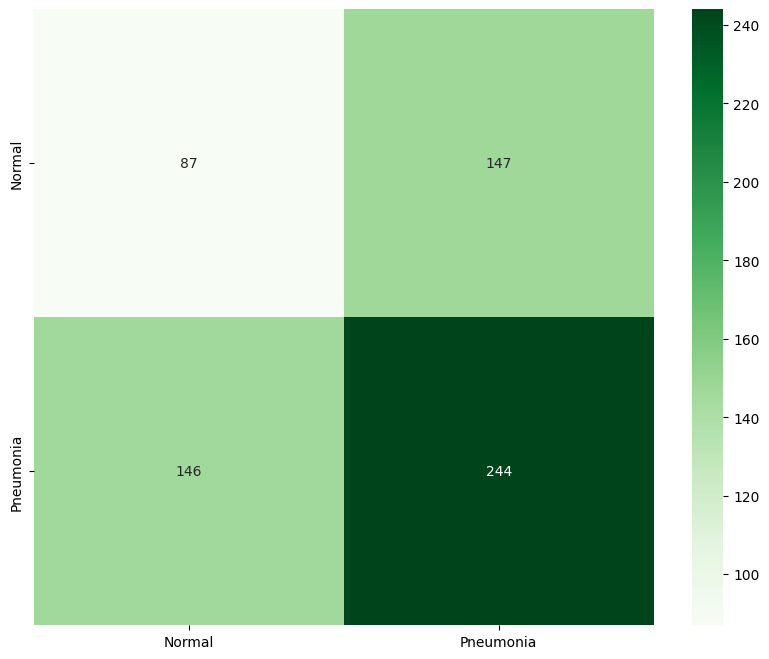

In [72]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,
           fmt='.3g',xticklabels=['Normal', 'Pneumonia'],
           yticklabels=['Normal', 'Pneumonia'],cmap='Greens')
plt.show()

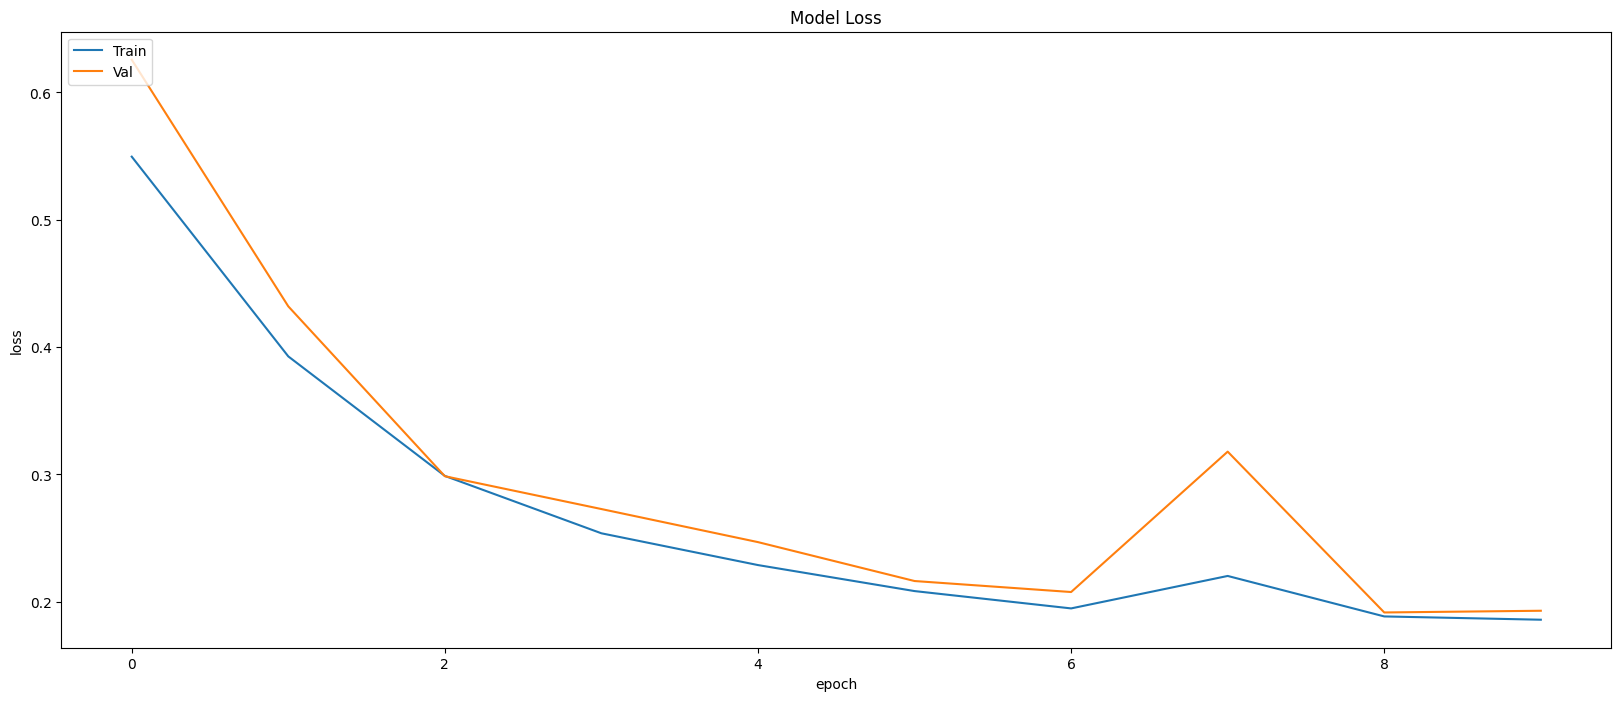

In [78]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

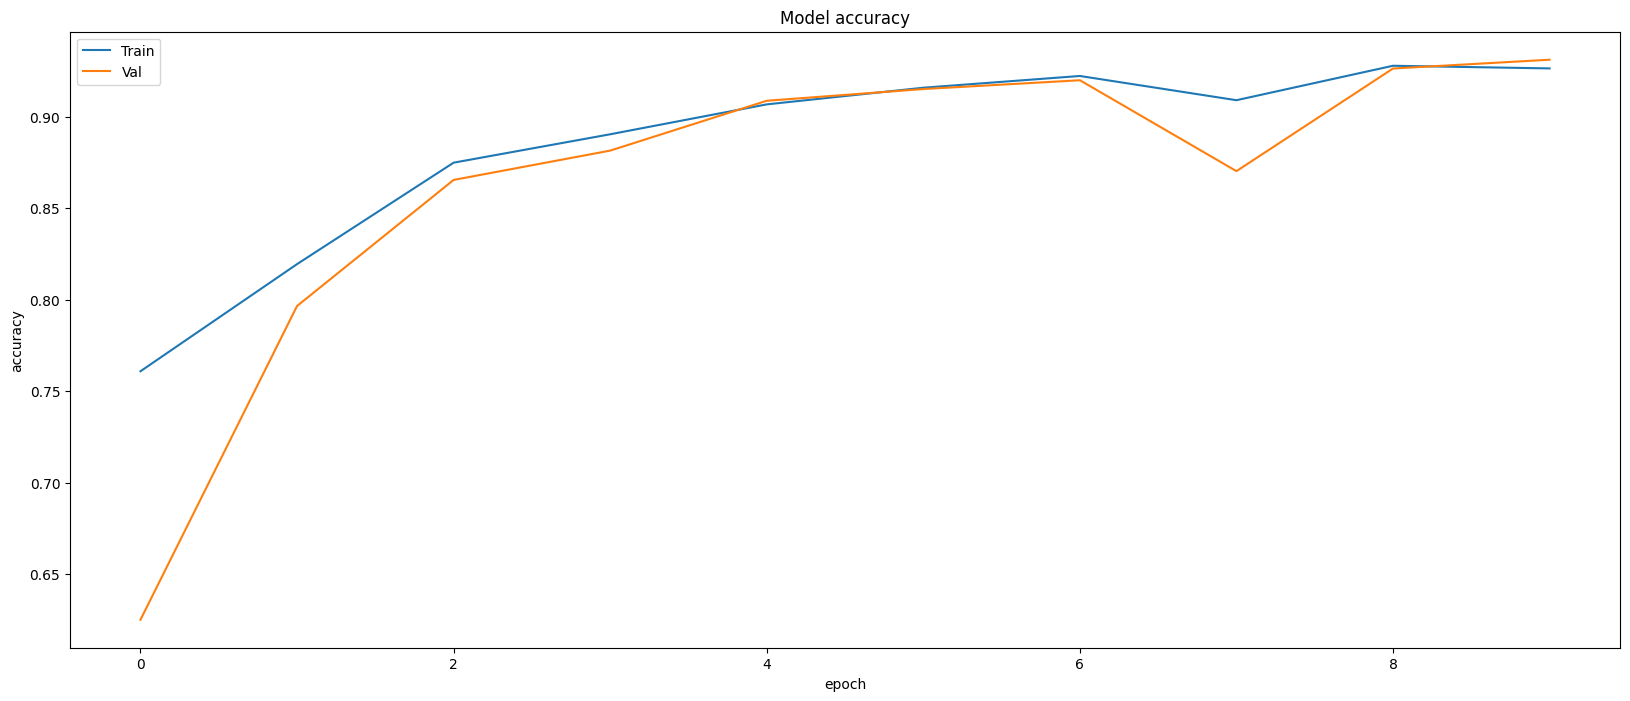

In [79]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [80]:
test_loss, test_acc = model.evaluate(validation_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

20/20 [==============================] - 19s 859ms/step - loss: 0.1929 - accuracy: 0.9311
Test loss: 0.1929055154323578
Test accuracy: 0.9310897588729858


### Saving the model

In [77]:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


## Checking at the systems' performance during the modeling

In [39]:
import wandb
wandb.init()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ········


wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\User/.netrc
